#  Q-Learning Implementation for FrozenLake Problem

# Part 1: Create the FrozenLake

# 1.1 Setting up FrozenLake grid:


Based on the specifications for the FrozenLake grid, a 5x5 grid is initialized with the following variables, with the start state at position (0, 0), the target state at location (5, 5), and the hole states at positions (1, 0, (1, 3), (3, 1), and (4, 2).

In [68]:
import numpy as np


In [69]:
# Define the number of rows in the lake
num_lake_rows = 5

# Define the number of columns in the lake
num_lake_columns = 5

# Define the starting position for the agent
starting_state = (0, 0)

# Define the goal position for the agent
ending_state = (5, 5)

# Define the positions of the holes in the lake as a list of tuples
hole_positions = [(1,0), (1,3), (3,1), (4,2)]

# CONFIGURATIONS

The code defines a class GameState which represents the state of the game. It has methods to calculate the score for a given position, check if the game is over, and determine the next position based on the action taken.

1. __init__(self, position=starting_state): This is the constructor method that initializes the game state with a starting position. The position argument is set to the starting_state by default, but can be overridden to specify a different starting position.

2. get_score(self, position): This method takes a position as input and returns the score for that position. The score is defined as 10 if the position is the ending_state, -5 if the position is one of the hole_positions, and -1 otherwise.

3. is_game_over(self): This method checks if the game is over by checking if the current position is either the ending_state or one of the hole_positions. It returns True if the game is over and False otherwise.

4. get_nxt_pos(self, action): This method takes an action as input and determines the next position of the agent based on the action taken. The action is specified as an integer from 0 to 3, where 0 corresponds to moving up, 1 corresponds to moving down, 2 corresponds to moving left, and 3 corresponds to moving right. The method returns the next position of the agent, which is calculated by adding or subtracting 1 from the current position depending on the action taken. However, if the next position is outside the grid world (i.e., if it has a negative row or column index or if it has a row or column index greater than or equal to 5), the method returns the current position instead.


In [70]:
# I have tried modifying the version of State class of Grid World Value Iteration code
# Source: Week 9 Gridworld_valueIteration_action_values_Exercise1.py by professor Dr. Enda Barret
# Modified by: Basabdatta Chaudhury

class GameState:
    def __init__(self, position=starting_state):
        """
        Initializes the game state with a starting position.
        """
        self.position = position

    def get_score(self, position):
        """
        Returns the score for a given position.
        """
        if position == ending_state:
            return 10
        elif position in hole_positions:
            return -5
        else:
            return -1

    def is_game_over(self):
        """
        Checks if the game is over (i.e., if the current position is either the goal state or one of the hole states).
        """
        if (self.position == ending_state) or (self.position in hole_positions):
            return True
        return False

    def get_nxt_pos(self, action):
        """
        Determines the next position of the agent based on the action taken.
        """
        if action == 0:                
            next_position = (self.position[0] - 1, self.position[1])
        elif action == 1:
            next_position = (self.position[0] + 1, self.position[1])
        elif action == 2:
            next_position = (self.position[0], self.position[1] - 1)
        else:
            next_position = (self.position[0], self.position[1] + 1)
        if (next_position[0] >= 0) and (next_position[0] <= 4):
            if (next_position[1] >= 0) and (next_position[1] <= 4):                    
                    return next_position
        return self.position



# Part 2: Implement the Reinforcement Learning algorithm Q-learning

This code snippet defines a class called Agent that uses Q-learning to solve the FrozenLake game. The Agent class contains several methods, including an initialization method that sets up the environment and initializes the Q-values to zero. 

1. __init__(self): Initializes the Agent object and sets various attributes such as the set of possible actions, current state, learning rate, discount factor, exploration vs exploitation trade-off, and initializes the Q-value estimates for all possible state-action pairs to zero.

2. get_max_action_value(self, position): Takes a state as input and returns the maximum action value estimate and the corresponding action for that state.

3. Q_Learn(self, episodes): Performs off-policy Q-learning for the agent for a given number of episodes. The method loops through all episodes and for each episode, it initializes the state to the starting state and loops until the terminal state is reached. During each loop iteration, it selects an action using an epsilon-greedy policy, observes the environment and receives the reward, calculates the TD-error and updates the Q-value estimate for the current state-action pair. The method returns the rewards per episode.

4. print_values(self): Formats and displays the action value estimates for all possible state-action pairs in a tabular form.

# Basic hyperparameters: Alpha = 0.5, Gamma = 0.9, and Epsilon = 0.10

In [71]:
class Agent:
    
    def __init__(self):
        # Set of possible actions
        self.actions = [0, 1, 2, 3] # up, down, left, right
        
        # Create a new state object
        self.current_state = GameState()
        
        # Learning rate
        self.alpha = 0.5
        
        # Discount factor
        self.gamma = 0.9
        
        # Exploration vs exploitation trade-off
        self.epsilon = 0.1
        
        # Initialise Q(s,a) values to 0 for all possible (state,action) pairs
        self.action_values = {}
        for row in range(num_lake_rows):
            for col in range(num_lake_columns):
                for action in range(len(self.actions)):
                    # Set initial value to 0 for Q(s,a)
                    self.action_values[(row, col, action)] = 0
    
    def get_max_action_value(self, position):
        """
        Find the maximum action value estimate for a given state
        """
        maxim_value = -999
        maxim_action = -1
        # Loop through all possible actions and find the one with the highest action value estimate
        for action in self.actions:
            if self.action_values[(position[0], position[1], action)] >= maxim_value:                             
                maxim_value = self.action_values[(position[0], position[1], action)]
                maxim_action = action            
        return maxim_value, maxim_action
    
    def Q_Learn(self, episodes):
        """
        Perform off-policy Q-learning for the Agent
        params :: episodes: number of episodes for which the 
                            FrozenLake experiment is to be run 
        """
        rewards = []
        # Loop through all episodes
        for epsd in range(episodes):
            rewards_per_episode = []            
            # Initialise state to starting state
            self.current_state = GameState()
            
            # Loop until terminal state is reached            
            while not self.current_state.is_game_over():            
                # If a random value is less than epsilon, choose a random action (exploration)
                if np.random.random() <= self.epsilon:                    
                    selected_action = np.random.randint(4)
                # Else choose the action with maximum action value estimate (exploitation)
                else:
                    # Get the action with maximum action value estimate for the current state
                    maxim_val, selected_action = self.get_max_action_value(self.current_state.position)
                
                # Observe the environment after taking the selected action in the current state
                
                # Get the next state after taking the selected action
                next_state = self.current_state.get_nxt_pos(selected_action)     
                
                # Get the reward for the current state
                reward = self.current_state.get_score(next_state)
                rewards_per_episode.append(reward)
                
                # Calculate the maximum action value estimate for the next state
                next_max_value, next_max_action = self.get_max_action_value(next_state)
    
                # Update the action value estimate for the current state-action pair, 
                # using the temporal difference (TD) update rule
                current_value = self.action_values[(self.current_state.position[0], self.current_state.position[1], selected_action)]
                error = reward + (self.gamma * next_max_value) - current_value
                current_value = current_value + (self.alpha * error)
                self.action_values[(self.current_state.position[0], self.current_state.position[1], selected_action)] = current_value
                
                # Set the current state to the next state
                self.current_state = GameState(position=next_state)                
                
            # Store the total reward for the episode
            
        return rewards
    
    def print_values(self):
        """
        Method to format and display action value estimates
        """
        for r in range(num_lake_rows):
            print('+' + '---------+' * num_lake_rows)
            out = '| '
            for c in range(num_lake_columns):
                max_next_value, maxim_action = self.get_max_action_value((r, c))
                out += '{:^8.3f}'.format(max_next_value) + ' | '
            print(out)
        print('+' + '---------+' * num_lake_rows)
        return "END"




In [72]:
# Create an empty list to store all the rewards for each agent
all_agent_rewards = []

# Create 5 agents that will traverse the Frozen lake
for agent_id in range(5):    
    # Set a random seed to reproduce the results
    np.random.seed(agent_id)
    print(f"Agent {agent_id + 1}")
    
    # Instantiate a new agent object
    new_agent = Agent()
    
    # Perform Q-learning for 10,000 episodes
    agent_rewards = new_agent.Q_Learn(10000)
    
    # Save the rewards per episode for the run
    all_agent_rewards.append(agent_rewards)
    
    # Print the action value estimates
    print(new_agent.print_values())


Agent 1
+---------+---------+---------+---------+---------+
|  -5.000  |  -5.500  |  -5.363  |  -4.961  |  -4.969  | 
+---------+---------+---------+---------+---------+
|  0.000   |  -5.000  |  -4.961  |  0.000   |  -4.682  | 
+---------+---------+---------+---------+---------+
|  -4.393  |  -4.688  |  -4.821  |  -4.534  |  -4.556  | 
+---------+---------+---------+---------+---------+
|  -4.312  |  0.000   |  -4.387  |  -4.337  |  -4.312  | 
+---------+---------+---------+---------+---------+
|  -4.183  |  -3.762  |  0.000   |  -4.284  |  -4.170  | 
+---------+---------+---------+---------+---------+
END
Agent 2
+---------+---------+---------+---------+---------+
|  -5.000  |  -5.500  |  -5.494  |  -4.999  |  -4.596  | 
+---------+---------+---------+---------+---------+
|  0.000   |  -5.000  |  -5.000  |  0.000   |  -4.520  | 
+---------+---------+---------+---------+---------+
|  -4.596  |  -4.865  |  -4.771  |  -4.381  |  -4.417  | 
+---------+---------+---------+---------+-------


Agent 1 Rewards per Episode: 


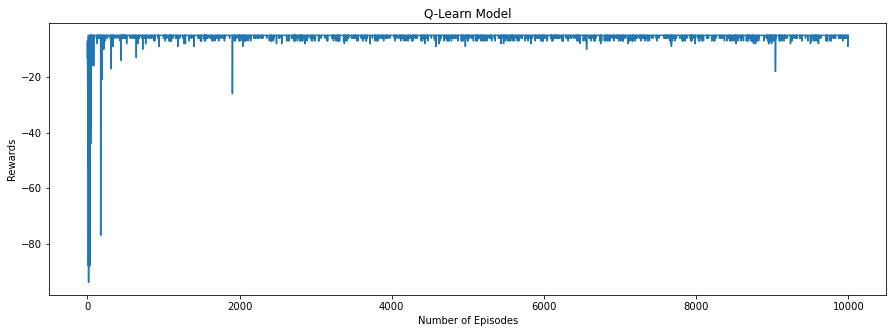


Agent 2 Rewards per Episode: 


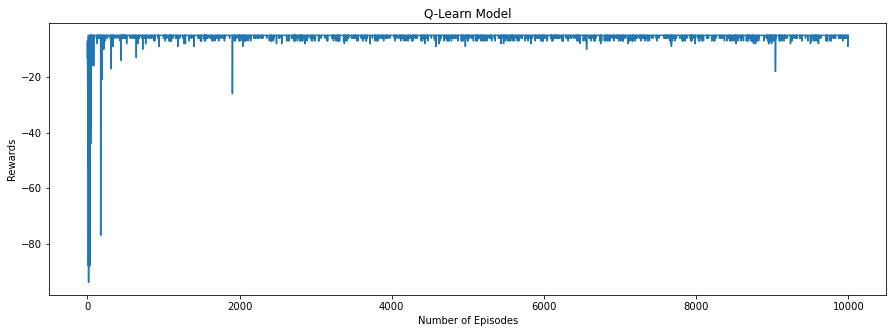


Agent 3 Rewards per Episode: 


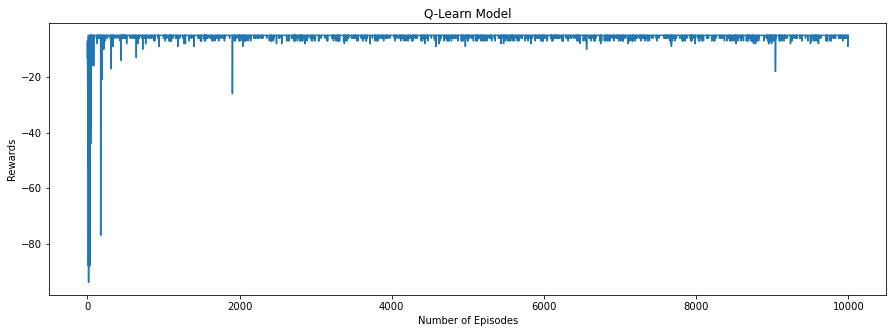


Agent 4 Rewards per Episode: 


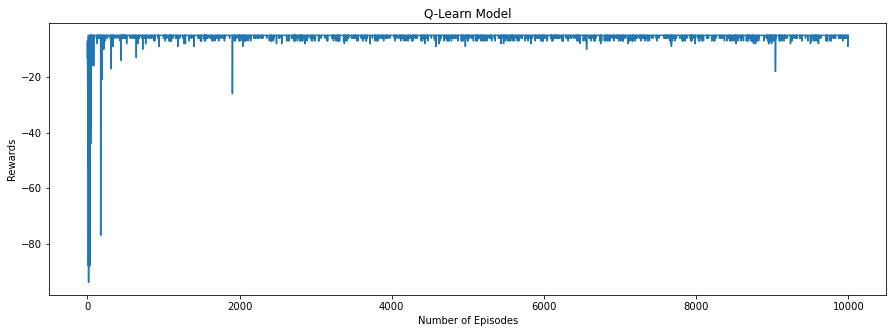


Agent 5 Rewards per Episode: 


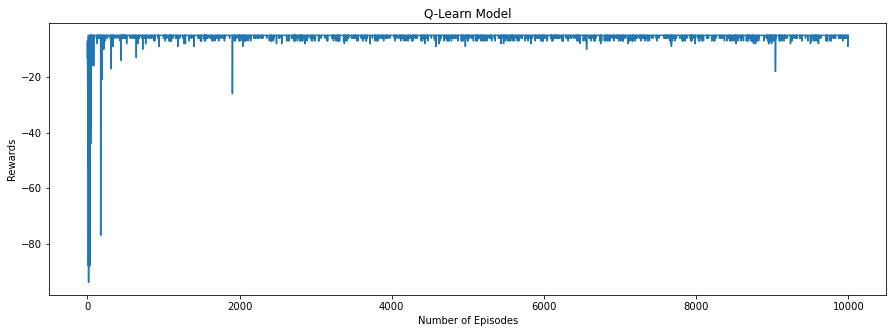

In [73]:
import matplotlib.pyplot as plt
for index, reward in enumerate(all_agent_rewards):
    print(f"\nAgent {index + 1} Rewards per Episode: ")
    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(10000), rewards)
    plt.title('Q-Learn Model')
    plt.ylabel('Rewards')
    plt.xlabel('Number of Episodes')
    plt.show()

# Epsilon decay: Alpha = 0.5, Gamma = 0.9, and Epsilon = 0.10. Decay Epsilon over the learning time so that Epsilon is 0.00 by the end of learning

In [74]:
class Agent1:
    
    def __init__(self):
        # Set of possible actions
        self.actions = [0, 1, 2, 3] # up, down, left, right
        
        # Create a new state object
        self.current_state = GameState()
        
        # Learning rate
        self.alpha = 0.5
        
        # Discount factor
        self.gamma = 0.9
        
        # Exploration vs exploitation trade-off
        self.epsilon = 0.1
        
        #Decay rate
        self.decay_rate = 0.0001
        
        # Initialise Q(s,a) values to 0 for all possible (state,action) pairs
        self.action_values = {}
        for row in range(num_lake_rows):
            for col in range(num_lake_columns):
                for action in range(len(self.actions)):
                    # Set initial value to 0 for Q(s,a)
                    self.action_values[(row, col, action)] = 0
    
    def get_max_action_value(self, position):
        """
        Find the maximum action value estimate for a given state
        """
        maxim_value = -999
        maxim_action = -1
        
        # Loop through all possible actions and find the one with the highest action value estimate
        for action in self.actions:
            if self.action_values[(position[0], position[1], action)] >= maxim_value:                             
                maxim_value = self.action_values[(position[0], position[1], action)]
                maxim_action = action            
        return maxim_value, maxim_action
    
    def Q_Learn(self, episodes):
        """
        Perform off-policy Q-learning for the Agent
        params :: episodes: number of episodes for which the 
                            FrozenLake experiment is to be run 
        """
        rewards = []
        alpha = 0.5
        gamma = 0.9
        epsilon = 0.1
        decay_rate = 0.0001

        # Loop through all episodes
        for epsd in range(episodes):
            rewards_per_episode = []            
            # Initialise state to starting state
            self.current_state = GameState()
            
            # Loop until terminal state is reached            
            while not self.current_state.is_game_over():            
                # If a random value is less than epsilon, choose a random action (exploration)
                if np.random.random() <= self.epsilon:                    
                    selected_action = np.random.randint(4)
                # Else choose the action with maximum action value estimate (exploitation)
                else:
                    # Get the action with maximum action value estimate for the current state
                    maxim_val, selected_action = self.get_max_action_value(self.current_state.position)
                
                # Observe the environment after taking the selected action in the current state
                
                # Get the next state after taking the selected action
                next_state = self.current_state.get_nxt_pos(selected_action)     
                
                # Get the reward for the current state
                reward = self.current_state.get_score(next_state)
                rewards_per_episode.append(reward)
                
                # Calculate the maximum action value estimate for the next state
                next_max_value, next_max_action = self.get_max_action_value(next_state)
    
                # Update the action value estimate for the current state-action pair, 
                # using the temporal difference (TD) update rule
                current_value = self.action_values[(self.current_state.position[0], self.current_state.position[1], selected_action)]
                error = reward + (self.gamma * next_max_value) - current_value
                current_value = current_value + (self.alpha * error)
                self.action_values[(self.current_state.position[0], self.current_state.position[1], selected_action)] = current_value
                
                # Set the current state to the next state
                self.current_state = GameState(position=next_state)  
                epsilon = epsilon * np.exp(-decay_rate * epsd)
            
            
            # Store the total reward for the episode
            
        return rewards
    
    def print_values(self):
        """
        Method to format and display action value estimates
        """
        for r in range(num_lake_rows):
            print('+' + '---------+' * num_lake_rows)
            out = '| '
            for c in range(num_lake_columns):
                max_next_value, maxim_action = self.get_max_action_value((r, c))
                out += '{:^8.3f}'.format(max_next_value) + ' | '
            print(out)
        print('+' + '---------+' * num_lake_rows)
        return "END"




In [75]:
# Create an empty list to store all the rewards for each agent
all_agent_rewards1 = []

# Create 5 agents that will traverse the Frozen lake
for agent_id in range(5):    
    # Set a random seed to reproduce the results
    np.random.seed(agent_id)
    print(f"Agent {agent_id + 1}")
    
    # Instantiate a new agent object
    new_agent1 = Agent1()
    
    # Perform Q-learning for 10,000 episodes
    agent_rewards1 = new_agent1.Q_Learn(10000)
    
    # Save the rewards per episode for the run
    all_agent_rewards1.append(agent_rewards1)
    
    # Print the action value estimates
    print(new_agent1.print_values())

Agent 1
+---------+---------+---------+---------+---------+
|  -5.000  |  -5.500  |  -5.363  |  -4.961  |  -4.969  | 
+---------+---------+---------+---------+---------+
|  0.000   |  -5.000  |  -4.961  |  0.000   |  -4.682  | 
+---------+---------+---------+---------+---------+
|  -4.393  |  -4.688  |  -4.821  |  -4.534  |  -4.556  | 
+---------+---------+---------+---------+---------+
|  -4.312  |  0.000   |  -4.387  |  -4.337  |  -4.312  | 
+---------+---------+---------+---------+---------+
|  -4.183  |  -3.762  |  0.000   |  -4.284  |  -4.170  | 
+---------+---------+---------+---------+---------+
END
Agent 2
+---------+---------+---------+---------+---------+
|  -5.000  |  -5.500  |  -5.494  |  -4.999  |  -4.596  | 
+---------+---------+---------+---------+---------+
|  0.000   |  -5.000  |  -5.000  |  0.000   |  -4.520  | 
+---------+---------+---------+---------+---------+
|  -4.596  |  -4.865  |  -4.771  |  -4.381  |  -4.417  | 
+---------+---------+---------+---------+-------


Agent 1 Rewards per Episode: 


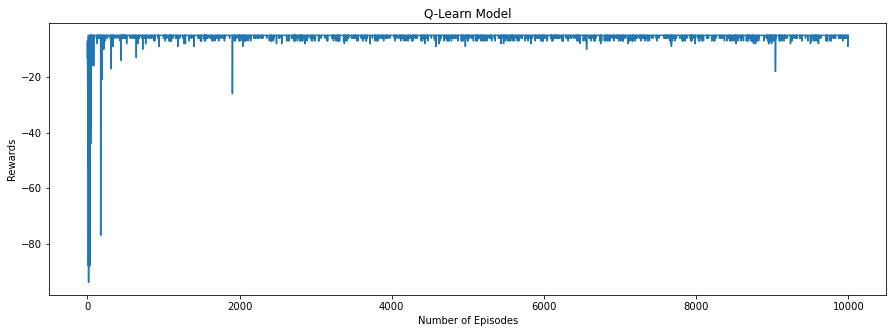


Agent 2 Rewards per Episode: 


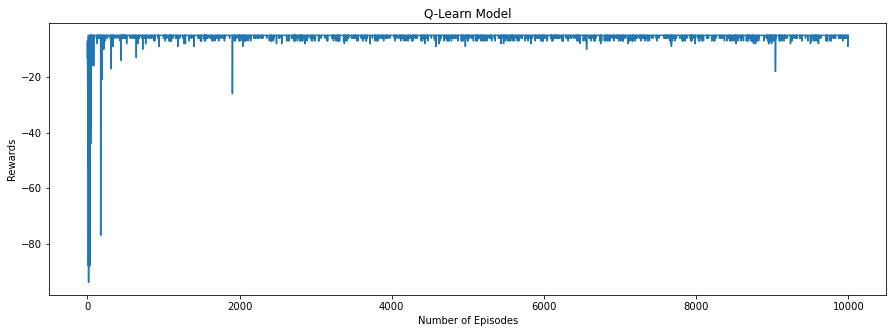


Agent 3 Rewards per Episode: 


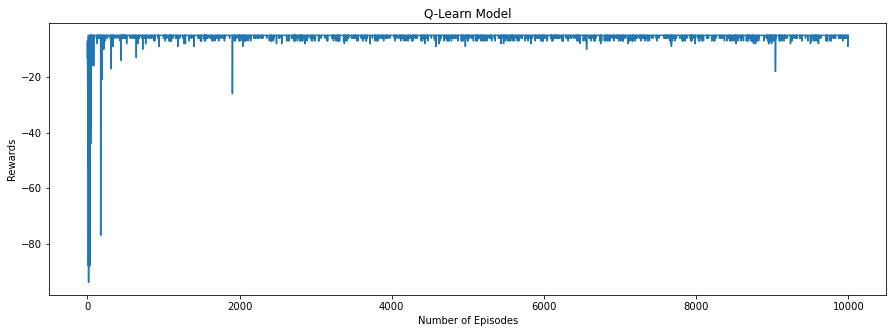


Agent 4 Rewards per Episode: 


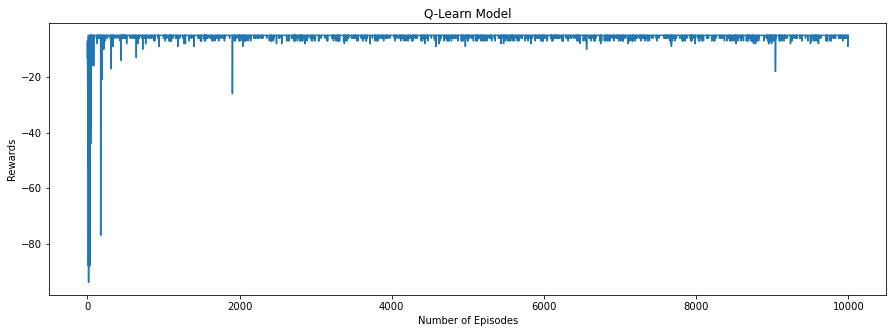


Agent 5 Rewards per Episode: 


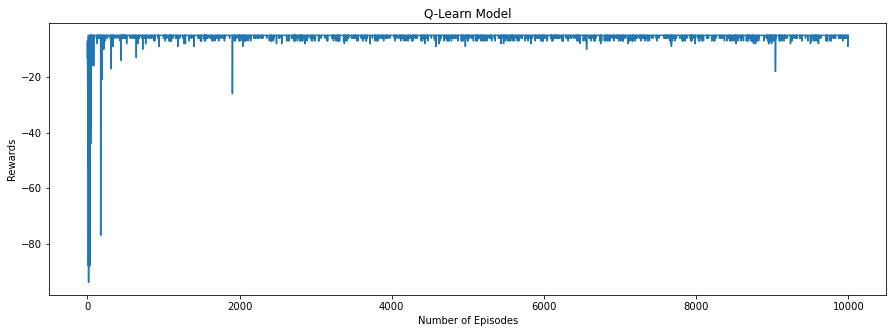

In [76]:
import matplotlib.pyplot as plt
for index, reward in enumerate(all_agent_rewards1):
    print(f"\nAgent {index + 1} Rewards per Episode: ")
    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(10000), rewards)
    plt.title('Q-Learn Model')
    plt.ylabel('Rewards')
    plt.xlabel('Number of Episodes')
    plt.show()

# Our hyperparameters: Alpha = 0.3, Gamma = 0.7, and Epsilon = 0.20

In [77]:
class Agent2:
    
    def __init__(self):
        # Set of possible actions
        self.actions = [0, 1, 2, 3] # up, down, left, right
        
        # Create a new state object
        self.current_state = GameState()
        
        # Learning rate
        self.alpha = 0.3
        
        # Discount factor
        self.gamma = 0.7
        
        # Exploration vs exploitation trade-off
        self.epsilon = 0.2
        
        #Decay rate
        self.decay_rate = 0.0001
        
        # Initialise Q(s,a) values to 0 for all possible (state,action) pairs
        self.action_values = {}
        for row in range(num_lake_rows):
            for col in range(num_lake_columns):
                for action in range(len(self.actions)):
                    # Set initial value to 0 for Q(s,a)
                    self.action_values[(row, col, action)] = 0
    
    def get_max_action_value(self, position):
        """
        Find the maximum action value estimate for a given state
        """
        maxim_value = -999
        maxim_action = -1
        
        # Loop through all possible actions and find the one with the highest action value estimate
        for action in self.actions:
            if self.action_values[(position[0], position[1], action)] >= maxim_value:                             
                maxim_value = self.action_values[(position[0], position[1], action)]
                maxim_action = action            
        return maxim_value, maxim_action
    
    def Q_Learn(self, episodes):
        """
        Perform off-policy Q-learning for the Agent
        params :: episodes: number of episodes for which the 
                            FrozenLake experiment is to be run 
        """
        rewards = []
        alpha = 0.5
        gamma = 0.9
        epsilon = 0.1
        decay_rate = 0.0001

        # Loop through all episodes
        for epsd in range(episodes):
            rewards_per_episode = []            
            # Initialise state to starting state
            self.current_state = GameState()
            
            # Loop until terminal state is reached            
            while not self.current_state.is_game_over():            
                # If a random value is less than epsilon, choose a random action (exploration)
                if np.random.random() <= self.epsilon:                    
                    selected_action = np.random.randint(4)
                # Else choose the action with maximum action value estimate (exploitation)
                else:
                    # Get the action with maximum action value estimate for the current state
                    maxim_val, selected_action = self.get_max_action_value(self.current_state.position)
                
                # Observe the environment after taking the selected action in the current state
                
                # Get the next state after taking the selected action
                next_state = self.current_state.get_nxt_pos(selected_action)     
                
                # Get the reward for the current state
                reward = self.current_state.get_score(next_state)
                rewards_per_episode.append(reward)
                
                # Calculate the maximum action value estimate for the next state
                next_max_value, next_max_action = self.get_max_action_value(next_state)
    
                # Update the action value estimate for the current state-action pair, 
                # using the temporal difference (TD) update rule
                current_value = self.action_values[(self.current_state.position[0], self.current_state.position[1], selected_action)]
                error = reward + (self.gamma * next_max_value) - current_value
                current_value = current_value + (self.alpha * error)
                self.action_values[(self.current_state.position[0], self.current_state.position[1], selected_action)] = current_value
                
                # Set the current state to the next state
                self.current_state = GameState(position=next_state)
                #Epsilon decay calculation
                epsilon = epsilon * np.exp(-decay_rate * epsd)
            
            
            # Store the total reward for the episode
            
        return rewards
    
    def print_values(self):
        """
        Method to format and display action value estimates
        """
        for r in range(num_lake_rows):
            print('+' + '---------+' * num_lake_rows)
            out = '| '
            for c in range(num_lake_columns):
                max_next_value, maxim_action = self.get_max_action_value((r, c))
                out += '{:^8.3f}'.format(max_next_value) + ' | '
            print(out)
        print('+' + '---------+' * num_lake_rows)
        return "END"




In [78]:
# Create an empty list to store all the rewards for each agent
all_agent_rewards2 = []

# Create 5 agents that will traverse the Frozen lake
for agent_id in range(5):    
    # Set a random seed to reproduce the results
    np.random.seed(agent_id)
    print(f"Agent {agent_id + 1}")
    
    # Instantiate a new agent object
    new_agent2 = Agent2()
    
    # Perform Q-learning for 10,000 episodes
    agent_rewards2 = new_agent2.Q_Learn(10000)
    
    # Save the rewards per episode for the run
    all_agent_rewards2.append(agent_rewards2)
    
    # Print the action value estimates
    print(new_agent2.print_values())

Agent 1
+---------+---------+---------+---------+---------+
|  -3.333  |  -3.333  |  -3.333  |  -3.333  |  -3.333  | 
+---------+---------+---------+---------+---------+
|  0.000   |  -3.333  |  -3.333  |  0.000   |  -3.333  | 
+---------+---------+---------+---------+---------+
|  -3.333  |  -3.333  |  -3.333  |  -3.333  |  -3.333  | 
+---------+---------+---------+---------+---------+
|  -3.333  |  0.000   |  -3.333  |  -3.333  |  -3.333  | 
+---------+---------+---------+---------+---------+
|  -3.333  |  -3.333  |  0.000   |  -3.333  |  -3.333  | 
+---------+---------+---------+---------+---------+
END
Agent 2
+---------+---------+---------+---------+---------+
|  -3.333  |  -3.333  |  -3.333  |  -3.333  |  -3.333  | 
+---------+---------+---------+---------+---------+
|  0.000   |  -3.333  |  -3.333  |  0.000   |  -3.333  | 
+---------+---------+---------+---------+---------+
|  -3.333  |  -3.333  |  -3.333  |  -3.333  |  -3.333  | 
+---------+---------+---------+---------+-------


Agent 1 Rewards per Episode: 


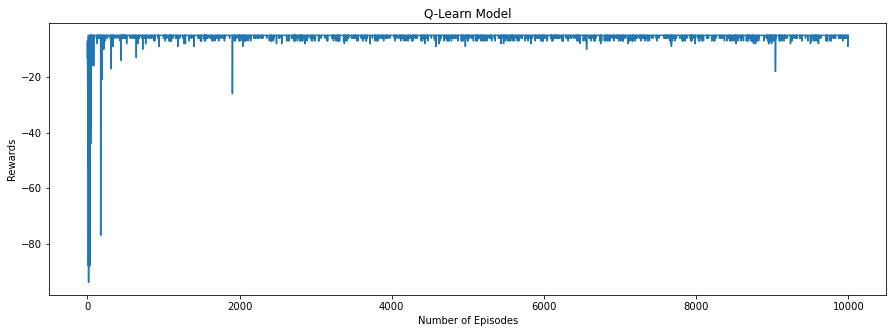


Agent 2 Rewards per Episode: 


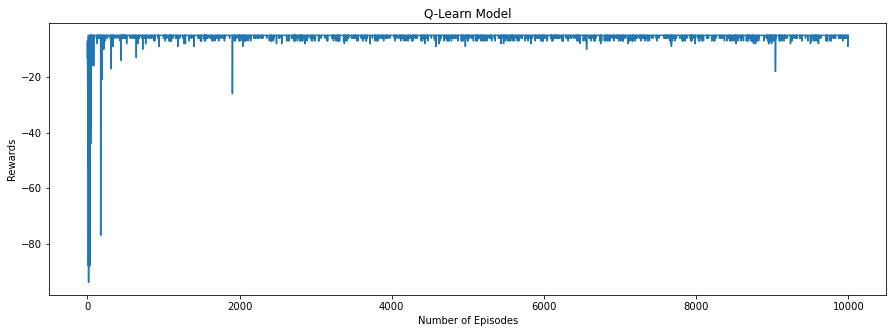


Agent 3 Rewards per Episode: 


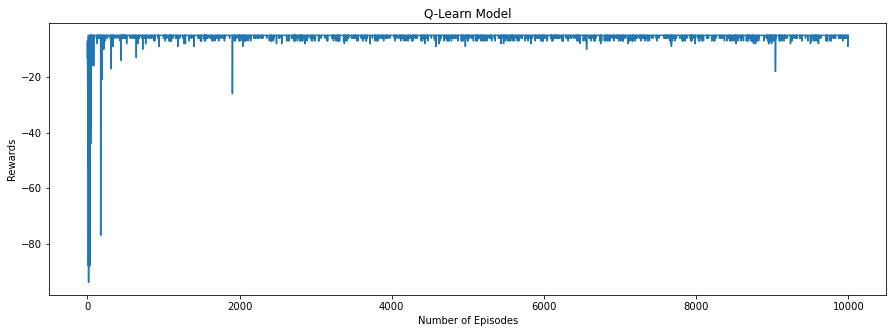


Agent 4 Rewards per Episode: 


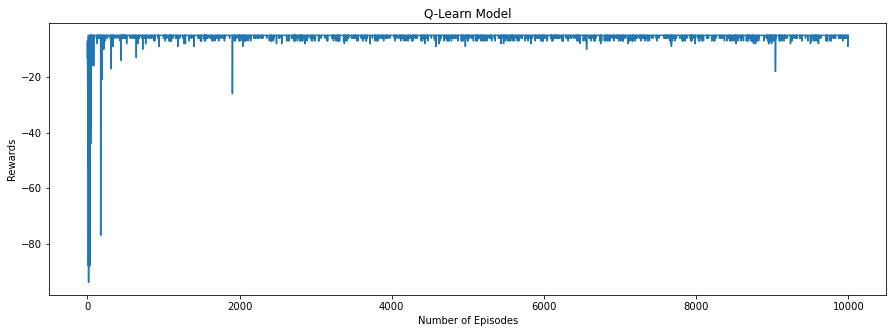


Agent 5 Rewards per Episode: 


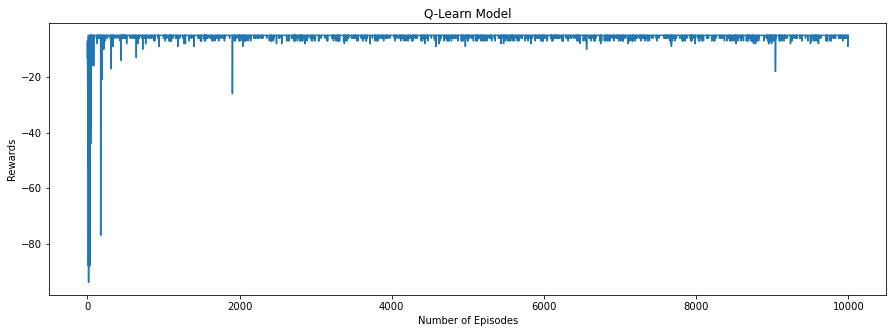

In [79]:
import matplotlib.pyplot as plt
for index, reward in enumerate(all_agent_rewards2):
    print(f"\nAgent {index + 1} Rewards per Episode: ")
    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(10000), rewards)
    plt.title('Q-Learn Model')
    plt.ylabel('Rewards')
    plt.xlabel('Number of Episodes')
    plt.show()